Build or load a 'CatchmentData' instance to allow access to all needed data

In [1]:
rebuild_catchment = False

In [2]:
from forecasting.catchment_data import CatchmentData
import pickle

if rebuild_catchment:
    catchment = CatchmentData("illinois-kerby-test", "14377100")

    pickle_out = open("temp_storage/catchment.pickle", "wb")
    pickle.dump(catchment, pickle_out)
    pickle_out.close()
else:
    pickle_in = open("temp_storage/catchment.pickle", "rb")
    catchment = pickle.load(pickle_in)

Create a Forecaster instance using the catchment instance and a desired Darts model.

In [3]:
from forecasting.forecaster import Forecaster

# Using a Block RNN
from darts.models import BlockRNNModel
block_rnn_forecaster = Forecaster(catchment, model_type=BlockRNNModel, model_save_dir="BlockRNN")

Importing plotly failed. Interactive plots will not work.
[2022-02-18 18:00:20,676] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-18 18:00:20,676] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-18 18:00:20,834] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-18 18:00:20,834] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


Loading existing models
Loading model for set 0
Loading model for set 1
All models loaded!


Fit both models

In [4]:
# Using a Block RNN
from darts.models import NBEATSModel
n_beats_forecaster = Forecaster(catchment, model_type=NBEATSModel, model_save_dir="NBEATSModel")

Building new models. Overwritting any existing models.
Building model for set 0
Building model for set 1
All models built!


In [5]:
block_rnn_forecaster.fit(epochs=20)

[2022-02-18 18:00:25,493] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 209962 samples.
[2022-02-18 18:00:25,493] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 209962 samples.


Fitting all models
Fitting model  0


  0%|          | 0/20 [00:00<?, ?it/s]

[2022-02-18 18:25:55,673] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 209962 samples.
[2022-02-18 18:25:55,673] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 209962 samples.


Fitting model  13.5692, validation loss: -3.2468, best val loss: -3.2468


  0%|          | 0/20 [00:00<?, ?it/s]

In [6]:
n_beats_forecaster.fit(epochs=20)

[2022-02-18 18:51:02,696] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 209962 samples.
[2022-02-18 18:51:02,696] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 209962 samples.
[2022-02-18 18:51:02,763] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-18 18:51:02,763] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


Fitting all models
Fitting model  0


  0%|          | 0/20 [00:00<?, ?it/s]

[2022-02-18 22:33:24,550] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 209962 samples.
[2022-02-18 22:33:24,550] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 209962 samples.
[2022-02-18 22:33:24,610] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-18 22:33:24,610] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


Fitting model  1


  0%|          | 0/20 [00:00<?, ?it/s]

In [23]:
hst_fcasts2 = block_rnn_forecaster.historical_forecasts(num_samples=100, forecast_horizon=12, stride=12)

Generating historical forecasts
Generating historical forecast for model  0


  0%|          | 0/2189 [00:00<?, ?it/s]

Generating historical forecast for model  1


  0%|          | 0/2189 [00:00<?, ?it/s]

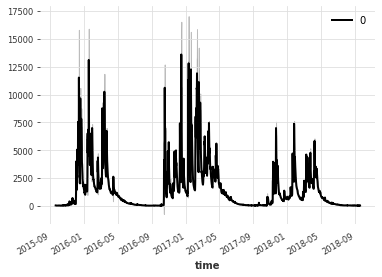

In [24]:
hst_fcasts2[0].plot()

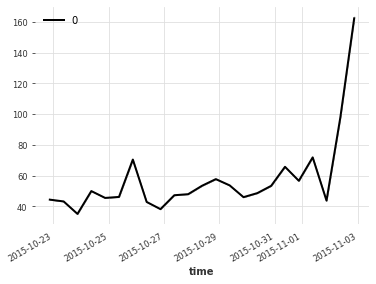

In [28]:
import pandas as pd
start = pd.to_datetime("2015-10-22T21:00:00.000000000")
end = pd.to_datetime("2015-11-02T21:00:00.000000000")
slice = hst_fcasts2[0].slice(start,end)
slice.plot()

In [11]:
slice

<TimeSeries (DataArray) (time: 23, component: 1, sample: 100)>
array([[[ 75.33900106,  75.52935366,  75.43378788, ...,  75.42980923,
          75.54236619,  75.53258072]],

       [[ 66.76966591,  66.59169342,  66.27957915, ...,  66.62586258,
          66.91700666,  67.2470728 ]],

       [[ 66.83027308,  66.78402525,  66.48264728, ...,  66.42542587,
          66.90134069,  66.90493528]],

       ...,

       [[670.27511278, 702.89714024, 727.74842524, ..., 694.74157437,
         663.29920091, 653.68753638]],

       [[362.21654284, 366.6650773 , 370.44209951, ..., 370.90922656,
         365.66038869, 369.89738125]],

       [[553.58198409, 632.97487351, 698.22504721, ..., 392.21530959,
         452.00066353, 374.38058925]]])
Coordinates:
  * time       (time) datetime64[ns] 2015-09-23T21:00:00 ... 2015-11-28T21:00:00
  * component  (component) object '0'
Dimensions without coordinates: sample

In [12]:
hst_fcasts = block_rnn_forecaster.historical_forecasts(num_samples=100, forecast_horizon=24, stride=12)

Generating historical forecasts
Generating historical forecast for model  0


  0%|          | 0/2188 [00:00<?, ?it/s]

Generating historical forecast for model  1


  0%|          | 0/2188 [00:00<?, ?it/s]

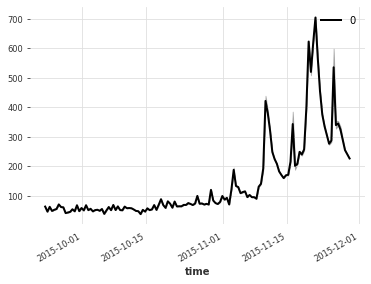

In [14]:
import pandas as pd
start = pd.to_datetime("2015-09-22T21:00:00.000000000")
end = pd.to_datetime("2015-11-28T21:00:00.000000000")
slice = hst_fcasts[0].slice(start,end)
slice.plot()

In [15]:
df = block_rnn_forecaster.dataset.y_validation.pd_dataframe()
target_scaler = block_rnn_forecaster.dataset.target_scaler
y_val = target_scaler.inverse_transform(block_rnn_forecaster.dataset.y_validation)
y_val = y_val.pd_dataframe()

In [21]:
y_pred =  hst_fcasts[0].quantile_df()

In [22]:
y_pred

,0_0.5
time,
2015-09-21 21:00:00,<xarray.DataArray ()>\narray(73.63625082)\nCoo...
2015-09-22 09:00:00,<xarray.DataArray ()>\narray(51.34038193)\nCoo...
2015-09-22 21:00:00,<xarray.DataArray ()>\narray(62.56821979)\nCoo...
2015-09-23 09:00:00,<xarray.DataArray ()>\narray(45.43405734)\nCoo...
2015-09-23 21:00:00,<xarray.DataArray ()>\narray(61.79115247)\nCoo...
...,...
2018-09-17 09:00:00,<xarray.DataArray ()>\narray(31.67382931)\nCoo...
2018-09-17 21:00:00,<xarray.DataArray ()>\narray(65.46087268)\nCoo...
2018-09-18 09:00:00,<xarray.DataArray ()>\narray(34.85106176)\nCoo...


In [17]:
frames= [hst_fcasts[0], y_val]
import pandas as pd
df_joined = pd.concat(frames, axis=1, join="inner")

TypeError: cannot concatenate object of type '<class 'darts.timeseries.TimeSeries'>'; only Series and DataFrame objs are valid

In [ ]:
df_joined[-550:-500].plot()